# Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
"""
Change directory to where this file is located
"""
# 로컬 경로
%cd './'     
# 구글 드라이브 경로
# %cd '/content/drive/MyDrive/Colab Notebooks/MLDL_HW2/'       

/Users/jspark/workspace/PycharmProjects/pythonProject/MLDL_HW2


/Users/jspark/workspace/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Import Modules

In [2]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

# Load Images

In [3]:
"""
DO NOT MODIFY THIS SECTION
"""

img = cv2.imread("img.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.astype(np.float32) / 255.
img = cv2.resize(img, (512, 362))

img.shape

(362, 512, 3)

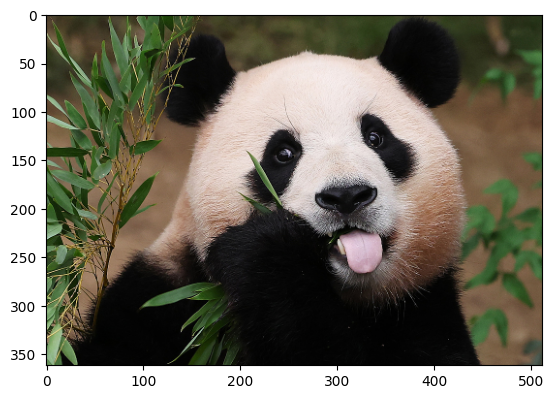

In [4]:
plt.imshow(img)

# Image Compression with K-Means Clustering

In [1]:
class kMeansImageCompression:
  def __init__(self, k = 1, img = None, max_iter = 1):
    self.k = k  # Number of centroids
    self.img = img  # input image dim = (H,W,3)
    self.max_iter = max_iter  # number of iterations

    self.centroid_list = None # list of pixel values of selected centroids dim = (k,3)
    self.J = None  # value of J in the Lecture 11 slide number 27
    self.compressed_img = np.empty((img.shape[0], img.shape[1], img.shape[2]))  # output image


  def initialize_centroid(self):
    """
    DO NOT MODIFY THIS SECTION.

    Initialize the centroids. Pick k random pixels as cluster centers.
    """
    np.random.seed(123)
    rand_H = np.random.randint(self.img.shape[0], size = self.k)
    rand_W = np.random.randint(self.img.shape[1], size = self.k)

    self.centroid_list = self.img[rand_H, rand_W]

  def assign_cluster(self, centroid_list):
    """
    Assign each pixel to the closest cluster center.

    ### Question (a) ###
    TO DO:
     - Calculate the distances between each pixel
       and centroid given centroid_list and store in 'distances'
       Dimension of distances = (k, H, W)

     - Assign each pixel to the closest centroid
       and store the index of assigned centroid for each pixel in 'label'
       Dimension of label = (H, W)

    Args:
      centroid_list
    Returns:
      distances, label
    """

    ###########################
    ### YOUR IMPLEMENTATION ###
    ###########################

    # distances shape = (k, H, W)
    distances = np.empty((self.k, self.img.shape[0], self.img.shape[1]))
    
    for i in range(self.k):
      # distance[i](H, W) =  (matrix(H,W,3) - array(3) broadcasting) 의 norm(3번째 축 RGB 3개의 거리를 계산)
      distances[i] = np.linalg.norm(self.img - centroid_list[i], axis=2)

    # 각 픽셀이 속하는 cluster index : label shape = (H, W)
    # 각 픽셀과 centroid k개의 거리 중 가장 짧은 centroid index 를 저장
    label = np.argmin(distances, axis=0)
    
    return distances, label

  def update_cluster(self, label):
    """
    Update the centroids.

    ### Question (b) ###
    TO DO:
     - Update the self.centroid_list given 'label'

    Args:
      label
    Returns:
      None
    """

    ###########################
    ### YOUR IMPLEMENTATION ###
    ###########################
    
    ## label을 기준으로 분류된 픽셀들의 평균값을 구해서 centroid를 변경(업데이트)
    # centroid_list , centroids dim = (k,3) , label dim = (H, W)
    for i in range(self.k):
      i_th_cluster = self.img[label == i]
      # i_th_cluster의 평균값을 centroid_list[i]에 저장(cluster의 중심점)
      self.centroid_list[i] = np.mean(i_th_cluster, axis=0)
      
  def calculate_J(self, distances):
      """
      Caculate the value of J.
  
      ### Question (c) ###
      TO DO:
       - Calculate the value of J given 'distances'
         and store the value in self.J
  
      Args:
        distances
      Returns:
        None
      """
      ###########################
      ### YOUR IMPLEMENTATION ###
      ###########################

      # J는 각 픽셀의 K개의 distance중 가장 작은 값의 합
      # distances dim = (k, H, W)
      self.J = np.sum(np.min(distances, axis=0))
      
  def comp_img(self, label, centroid_list):
      """
      DO NOT MODIFY THIS SECTION
  
      Produce the compressed image.
      """
      for idx, (i, j) in enumerate(np.ndindex(self.img.shape[:2])):
        self.compressed_img[i, j] = centroid_list[label[i, j]]


  def kmeans_imgcomp(self):
    """
    Update the centroid list with max_iter times.

    ### Question (d) ###

    TO DO:
     - Using the above implementations,
          update the centroids for self.max_iter times
          and assign the pixels to the closest centroid in final self.centroid_list
              to get final 'distances' and 'label'.
    *** NO initialization of centroids needed ***

    Args:
      None
    Returns:
      self.compressed_image, self.J
    """
    ###########################
    ### YOUR IMPLEMENTATION ###
    ###########################
    
    for _ in range(self.max_iter):
      # step 1 : assign cluster
      distances, label = self.assign_cluster(self.centroid_list)
      # step 2 : update cluster
      self.update_cluster(label)

    """
    DO NOT MODIFY BELOW
    """
    self.calculate_J(distances)
    self.comp_img(label, self.centroid_list)

    return self.compressed_img, self.J



9


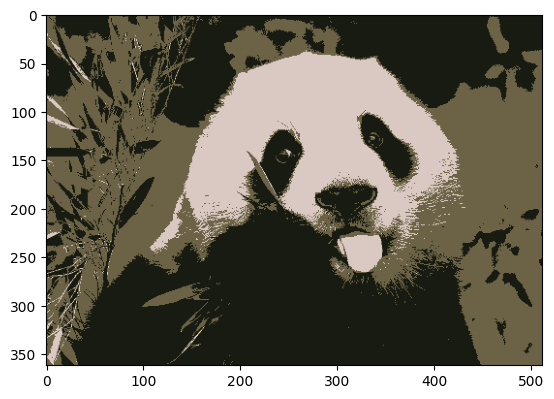

In [13]:
## test code for kMeansImageCompression
kic = kMeansImageCompression(3, img, max_iter = 5)
kic.initialize_centroid()
compressed_img, j_value = kic.kmeans_imgcomp()
print(np.unique(compressed_img).size)
plt.imshow(compressed_img)

# Choosing the value of k

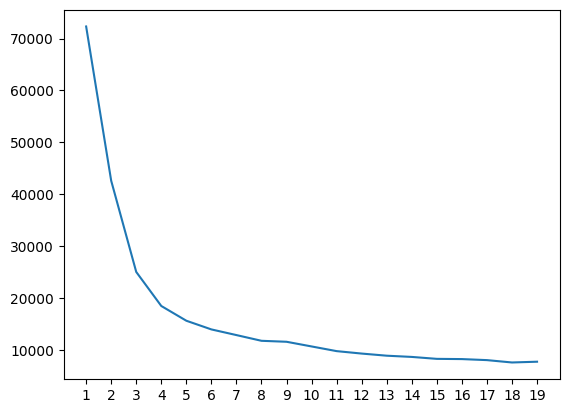

In [5]:
"""
DO NOT MODIFY THIS SECTION

***  If your implementation is efficient enough,   ***
***      this cell will be run within 2 mins.      ***

Plotting the value of J for each value of k.
"""

k_list = np.arange(1, 20, step = 1)
J_list = []
for i in k_list:
  ic = kMeansImageCompression(i, img, max_iter = 20)
  ic.initialize_centroid()
  _, J = ic.kmeans_imgcomp()
  J_list.append(J)

plt.plot(k_list, J_list)
plt.xticks(np.arange(1, 20, 1))
plt.show()

In [6]:
"""
### Question (e) ###
According to the above plot, select your k and explain your choice.
"""
your_k = 5
print(your_k)

5


### 선택한 K값 : 5
- K가 커질수록 J값(각 픽셀과 centroid 간의 거리 합)은 줄어들기에, k가 완만하게 줄어들기 시작하는 **elbow point** 인 6을 선택


# Final Compressed Image

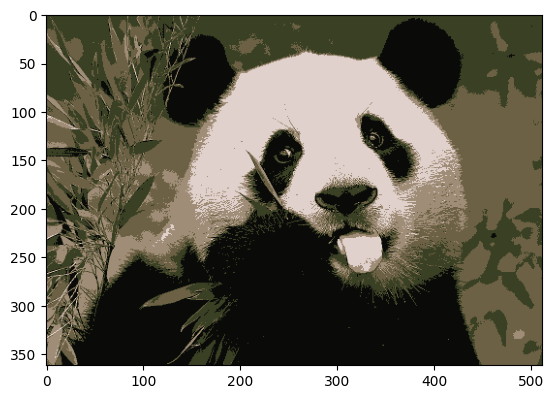

In [7]:
"""
DO NOT MODIFY THIS SECTION

### Question (f) ###
TO DO:
 - Run this cell for the final compressed image
"""
your_ic = kMeansImageCompression(your_k, img, max_iter = 20)
your_ic.initialize_centroid()
final_img, _ = your_ic.kmeans_imgcomp()

plt.imshow(final_img)